<font size=+4 color="Black"><center><b>Vehicle Loan Default Prediction</b></center></font>
<font size=-1 color="Black"><center><b>Classification Models </b></right></font>

<font size="+2" color="Green"><b>Please Upvote if you like the work</b></font>


### About this notebook

## Banking industry is using classification models to predict the default or raise red flags on the accounts which are likely to default. One major problem is of Imbalanced Distribution of classes i.e. the available training data consists more of non-default accounts vs. default accounts. Here is my take on tackling such a problem.
## This notebook covers various EDA, Outlier treatment, PCA, Variable Inspection, Classification models etc.


![](https://media3.giphy.com/media/mnptBuEshROyk/giphy.gif)



### Plenty of times we get data where there is imbalanced class distribution. This notebooks covers the existing methodologies to tackle such problems.[](http://)

Contents:

* [1. Importing data & libraries](#1)
* [2. Variable Inspection](#2)
* [3. EDA](#3)
    * [3.1 Class Distribution](#4)
    * [3.2 Default Timeline](#5)
    * [3.3 Univariate analysis](#6)  
    * [3.4 Outlier Treatment](#7)
    * [3.5 Feature Selection](#8)
        * [3.5.1 Standardization of data](#9)
        * [3.5.2 Dummy insertion](#10)
* [4. Models](#11)
    * [4.1 Logistic Regression](#12)
    * [4.2 Random Forest](#13)
    * [4.3 Naive Bayes](#14)
    * [4.4 Stochastic Gradient Descent](#15)
    * [4.5 Decision Tree Classifier](#16)
    * [4.6 XG Boost](#17)
* [5. Dealing with Imbalanced Data](#18)
    * [5.1 SMOTE](#19)
    * [5.2 Upsampling](#20)
    * [5.3 Downsampling](#21)
    * [5.4 PCA](#22)
    * [5.1 Resampling](#23)

 <a id="1"></a>
    
<font size="+2" color="indigo"><b>1. Importing data & libraries</b></font><br>

In [10]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)


c:\Users\PC\Data\ads_fraud_detection


In [11]:
from config.config import *
from libs.common import *

In [12]:
save_dir=f"{exps_dir}/exp_prj_vehicle_loan_prediction"
if os.path.exists(save_dir) == False: 
  os.makedirs(save_dir, exist_ok=True)



In [13]:
        
test = pd.read_csv(f'{data_dir}/vehicle_loan_prediction/test.csv')
train = pd.read_csv(f'{data_dir}/vehicle_loan_prediction/train.csv')


In [14]:
print(train.shape, test.shape)

(233154, 41) (112392, 40)


In [15]:
train.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT'], dtype='object')

In [16]:
for i in train.columns:
    if i not in test.columns:
        print(i)

LOAN_DEFAULT


In [17]:
test

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,03-11-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,20-11-2018,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,29-11-2018,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,29-11-2018,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,17-11-2018,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,755547,44875,72509,67.58,74,16646,86,2591,14-05-1992,Self employed,28-11-2018,4,3823,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112388,716994,53549,72509,78.61,74,16646,86,2593,24-04-1984,Self employed,19-11-2018,4,3823,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112389,709352,55243,72509,81.37,74,16646,86,2593,01-01-1986,Self employed,17-11-2018,4,3823,1,1,0,0,0,0,785,B-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0
112390,699795,55243,72509,81.37,74,16646,86,2593,01-01-1973,Self employed,15-11-2018,4,3823,1,1,0,0,0,0,714,D-Very Low Risk,1,1,0,36380,100000,100000,0,0,0,0,0,0,0,0,1,1,0yrs 3mon,0yrs 3mon,0


In [18]:
train

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,26-10-2018,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,23-10-2018,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,24-10-2018,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,29-09-2018,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [19]:
df= pd.concat ([train, test])

In [20]:
#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)
print(" Shape of testing dataframe: ", test.shape)
# Drop duplicates
train.drop_duplicates()
test.drop_duplicates()
print(train.shape)
print(test.shape)

 Shape of training dataframe:  (233154, 41)
 Shape of testing dataframe:  (112392, 40)
(233154, 41)
(112392, 40)


 <a id="2"></a>
    
<font size="+2" color="indigo"><b>2. Variable Inspection</b></font><br>

In [21]:
print("Names of columns ", list(train.columns))

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


In [22]:
#Null values in training dataset

null= train.isnull().sum().sort_values(ascending=False)
total =train.shape[0]
percent_missing= (train.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [23]:
#Null values in test dataset

null= test.isnull().sum().sort_values(ascending=False)
total =test.shape[0]
percent_missing= (test.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           3443         0.030634
1                              UNIQUEID              0         0.000000
22                       DISBURSAL_DATE              0         0.000000
23                           ASSET_COST              0         0.000000
24                                  LTV              0         0.000000
25                            BRANCH_ID              0         0.000000
26                          SUPPLIER_ID              0         0.000000
27                      MANUFACTURER_ID              0         0.000000
28                   CURRENT_PINCODE_ID              0         0.000000
29                        DATE_OF_BIRTH              0         0.000000
30                             STATE_ID              0         0.000000
31                    PERFORM_CNS_SCORE              0         0.000000
32                     EMPLOYEE_COD

 #### Flag 1: 3443 missing values in employment type

In [24]:
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' nan]
['Salaried' 'Self employed' nan]


In [25]:
train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Missing")
test.EMPLOYMENT_TYPE= test.EMPLOYMENT_TYPE .fillna("Missing")
train_null_unique= train.EMPLOYMENT_TYPE .unique()
test_null_unique= test.EMPLOYMENT_TYPE .unique()
print(train_null_unique)
print (test_null_unique)

['Salaried' 'Self employed' 'Missing']
['Salaried' 'Self employed' 'Missing']


In [26]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

#### Flag 2:
#### AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int. 
#### DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type

#### Lets' check...

In [27]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH

train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

test[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = test['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
test[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = test['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
test["AVERAGE_ACCT_AGE"]= test["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((test["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

test[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = test['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
test[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = test['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
test["CREDIT_HISTORY_LENGTH"]= test["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((test["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
test= test.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [28]:
train['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
#format='%d%b%Y:%H:%M:%S.%f'
test['DATE_OF_BIRTH'] =  pd.to_datetime(test['DATE_OF_BIRTH'], format='%d-%m-%Y')
train['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')
test['DISBURSAL_DATE'] =  pd.to_datetime(test['DISBURSAL_DATE'], format='%d-%m-%Y')

In [29]:
#remove_n = 128000
#temp= train[train['LOAN_DEFAULT']==0]
#drop_indices = np.random.choice(temp.index, remove_n, replace=False)
#df_temp = temp.drop(drop_indices)
#temp2= train[train['LOAN_DEFAULT']==1]
#del train
#train= pd.concat ([df_temp, temp2])

 <a id="3"></a>
    
<font size="+2" color="indigo"><b>3. EDA</b></font><br>

 <a id="4"></a>
    
<font size="+2" color="indigo"><b>3.1 Class Distribution</b></font><br>

In [30]:
class_df = train.groupby('LOAN_DEFAULT').count()['UNIQUEID'].reset_index().sort_values(by='UNIQUEID',ascending=False)
class_df.style.background_gradient(cmap='winter')


,LOAN_DEFAULT,UNIQUEID
0,0,182543
1,1,50611


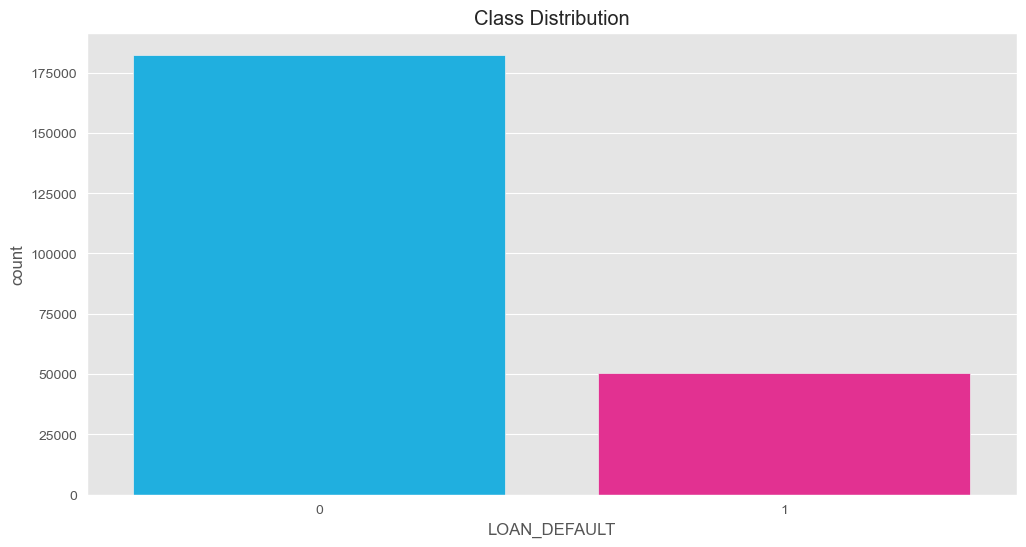

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [31]:
#Graph
my_pal = {'0': 'deepskyblue', '1': 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(train[train['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(train[train['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

### Flag : Uneven class

In [32]:
print("Employment type\n")
print(train.groupby(["EMPLOYMENT_TYPE"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Mobile Flag\n")
print(train.groupby(["MOBILENO_AVL_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Aadhar Flag\n")
print(train.groupby(["AADHAR_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Pan Flag\n")
print(train.groupby(["PAN_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Voter ID Flag\n")
print(train.groupby(["VOTERID_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Driving L Flag\n")
print(train.groupby(["DRIVING_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Passport\n")
print(train.groupby(["PASSPORT_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))

Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.785407
                 1               0.214593
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: proportion, dtype: float64
##############

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.782929
                   1               0.217071
Name: proportion, dtype: float64
##############

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.743594
             1               0.256406
1            0               0.790403
             1               0.209597
Name: proportion, dtype: float64
##############

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0               0.783170
          1               0.216830
1         0               0.779978
          1               0.220022
Name: proportion, dtype: float64
##############

Voter ID

In [33]:

print(train.groupby(["LOAN_DEFAULT","EMPLOYMENT_TYPE","AADHAR_FLAG","PAN_FLAG","DRIVING_FLAG","PASSPORT_FLAG"]).VOTERID_FLAG.value_counts(normalize=False))
print("##############\n")


LOAN_DEFAULT  EMPLOYMENT_TYPE  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  VOTERID_FLAG
0             Missing          0            0         0             0              1                 451
                                                                    1              0                  10
                                                      1             0              0                  44
                                                                                   1                   4
                                            1         0             0              1                  16
                                                                                   0                   1
                                                      1             0              0                   1
                               1            0         0             0              0                5315
                                                                

In [34]:
train_0 = train[train["LOAN_DEFAULT"]==0]
train_1 = train[train["LOAN_DEFAULT"]==1]

 <a id="5"></a>
    
<font size="+2" color="indigo"><b>3.2 Default vs Disbursal date</b></font><br>


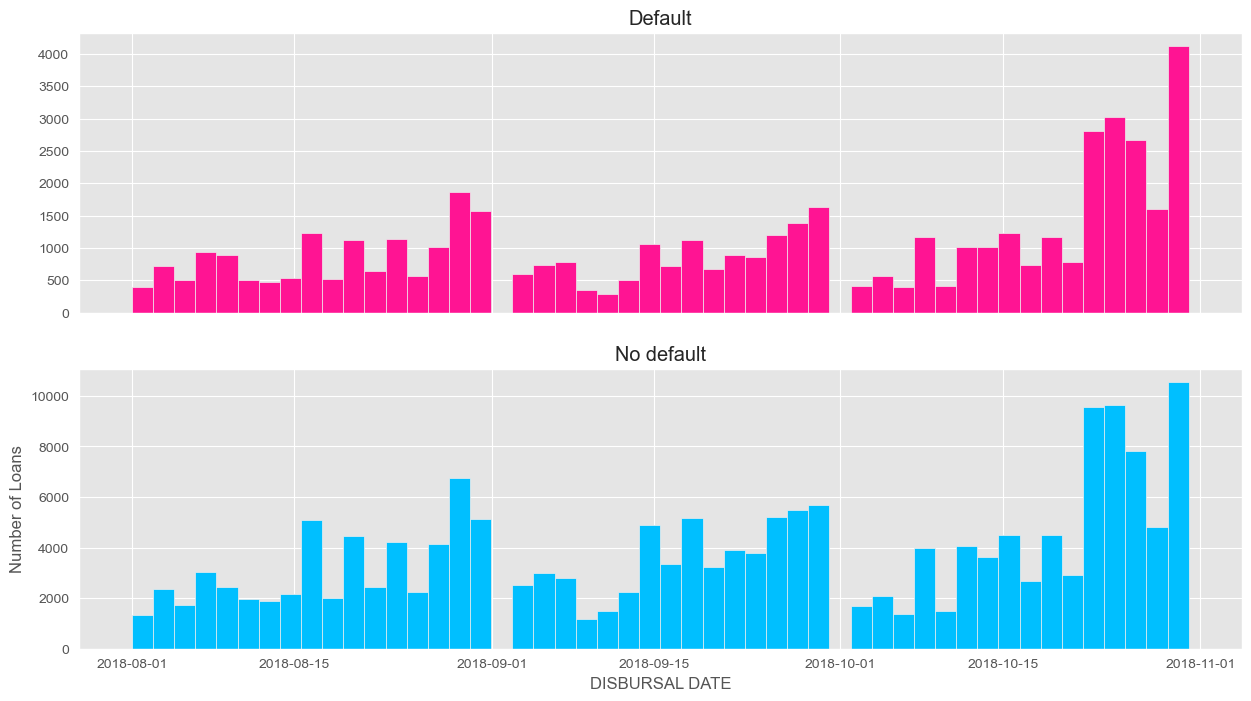

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 1], bins = bins, color = 'deeppink')
ax1.set_title('Default')

ax2.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('No default')

plt.xlabel('DISBURSAL DATE')
plt.ylabel('Number of Loans')
plt.show()

 <a id="6"></a>
    
<font size="+2" color="indigo"><b>3.3 Univariate analysis</b></font><br>


In [36]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = train.loc[train['LOAN_DEFAULT'] != 0]
    t0 = train.loc[train['LOAN_DEFAULT'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="LOAN_DEFAULT = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="LOAN_DEFAULT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [37]:
def plot_bar_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(train[feature])
        sns.countplot(train[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
    

In [38]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()


In [39]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train);

### Let's look into variables with high importance
### Loan information

###  'DISBURSED_AMOUNT' : Amount of Loan disbursed

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


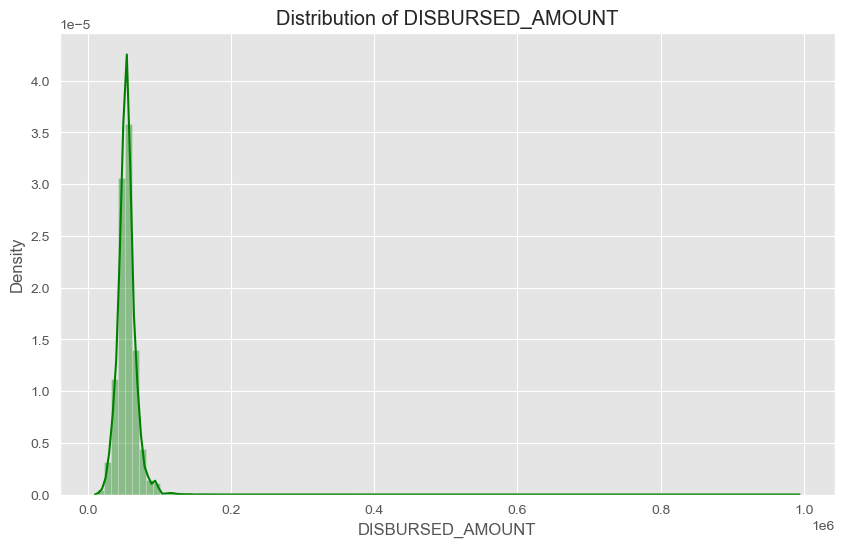

In [40]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','green')


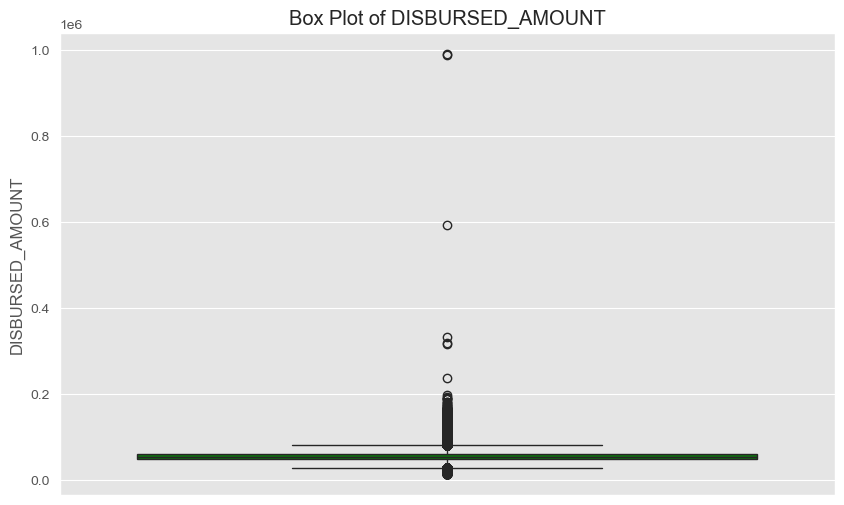

In [41]:
plot_box("DISBURSED_AMOUNT", "green")

#### Since there are outliers - either we can treat outliers or do the binning
#### Here, we have the liberty of performing both and comparing their results

 <a id="7"></a>
    
<font size="+2" color="indigo"><b>3.4 Outlier Treatment </b></font><br>


In [42]:
#Number of observations in column
obs = len(train.DISBURSED_AMOUNT)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.DISBURSED_AMOUNT), std(train.DISBURSED_AMOUNT)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.DISBURSED_AMOUNT if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076


In [43]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)
train["DISBURSED_AMOUNT_new"]= train["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))

No. of observations in column:  233154


### Binning
#### mean      54356.993528
#### std       12971.314171
#### min       13320.000000
#### 25%       47145.000000
#### 50%       53803.000000
#### 75%       60413.000000
#### max      990572.000000

In [44]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['DISBURSED_AMOUNT_bins'] = pd.qcut(train['DISBURSED_AMOUNT'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['DISBURSED_AMOUNT_bins'].value_counts()


DISBURSED_AMOUNT_bins
Medium     58676
Low        58537
Extreme    58207
High       57734
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

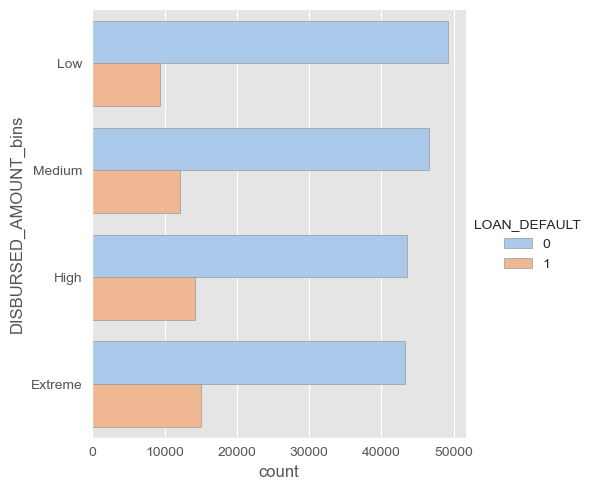

In [45]:
plot_bar("DISBURSED_AMOUNT_bins")

### 'ASSET_COST' : Payment default in the first EMI on due date

count             233154.0
mean     75865.06814380195
std      18944.78128866517
min                37000.0
25%                65717.0
50%                70946.0
75%               79201.75
max              1628992.0
Name: ASSET_COST, dtype: object


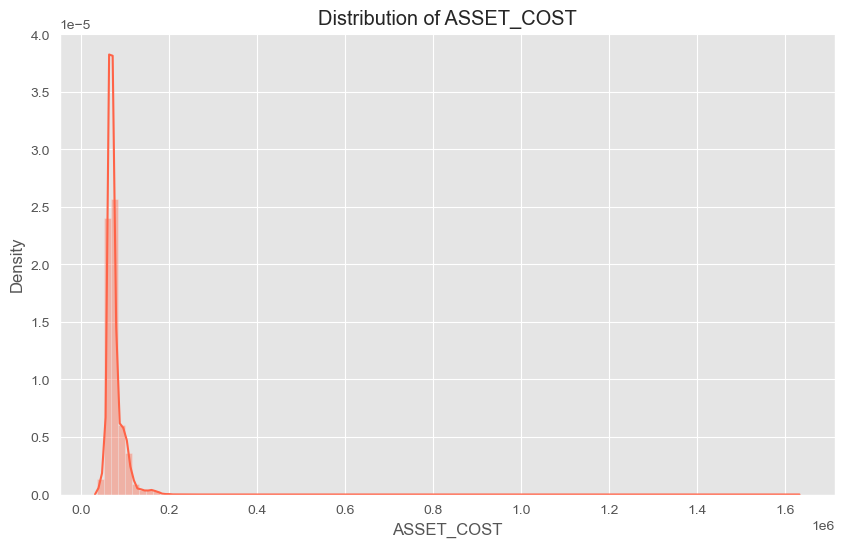

In [46]:
print(train.ASSET_COST.describe().astype(str))
plot_distribution('ASSET_COST','tomato')

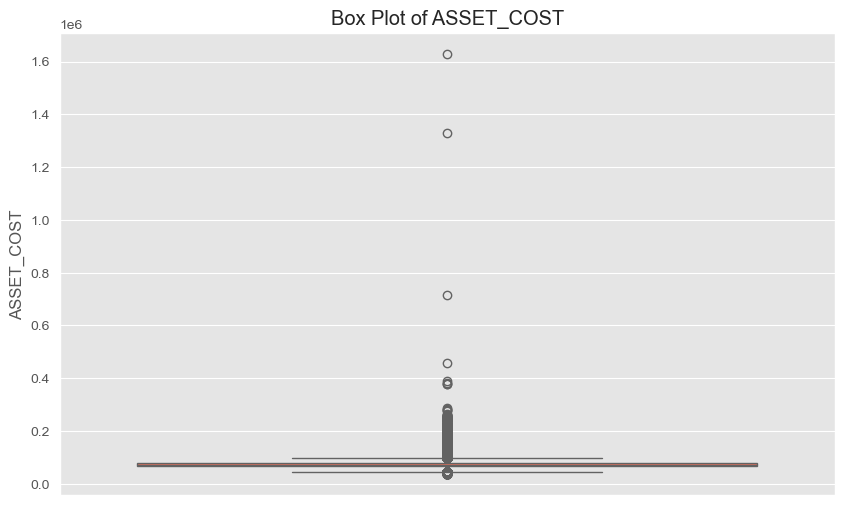

In [47]:
plot_box("ASSET_COST", "tomato")

In [48]:
#Number of observations in column
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(df[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

    


In [49]:
outlier_data(train,"ASSET_COST")

No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425


In [50]:
train["ASSET_COST_new"]= train["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))
outlier_data(train,"ASSET_COST_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=68018.188, Std dev=9598.448
Identified outliers: 60


### Binning
#### mean     75865.06814380195
#### std      18944.78128866517
#### min                37000.0
#### 25%                65717.0
#### 50%                70946.0
#### 75%               79201.75
#### max              1628992.0

In [51]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['ASSET_COST_bins'] = pd.qcut(train['ASSET_COST'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['ASSET_COST_bins'].value_counts()

ASSET_COST_bins
Low        58290
Extreme    58289
Medium     58288
High       58287
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

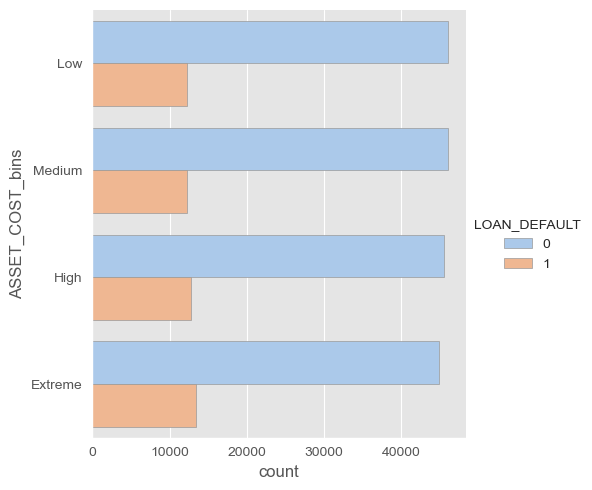

In [52]:
plot_bar("ASSET_COST_bins")

### LTV

count              233154.0
mean      74.74653001878589
std      11.456635738792304
min                   10.03
25%                   68.88
50%                    76.8
75%                   83.67
max                    95.0
Name: LTV, dtype: object


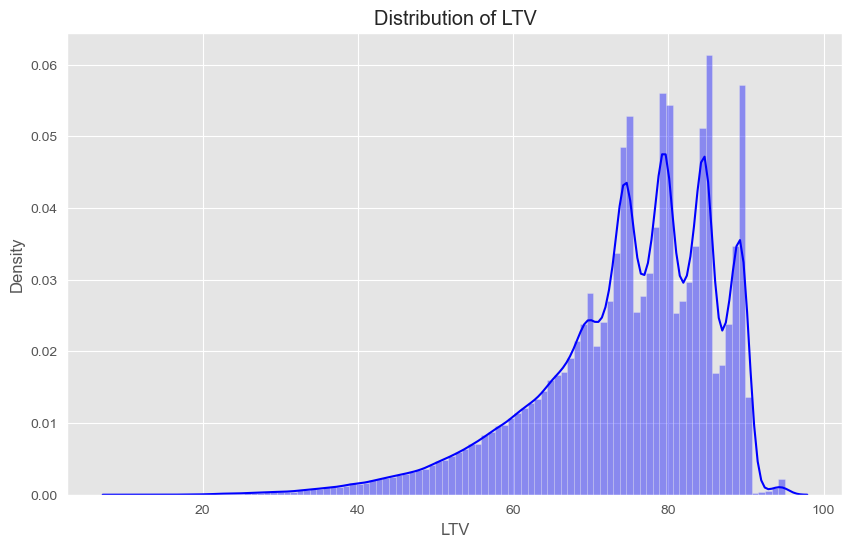

In [53]:
print(train.LTV.describe().astype(str))
plot_distribution('LTV','blue')


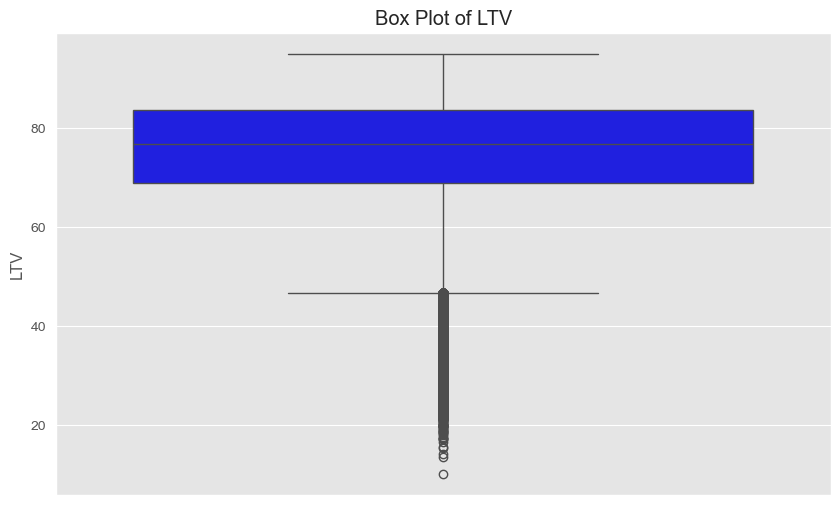

In [54]:

plot_box("LTV", "blue")


In [55]:
outlier_data(train,"LTV")

No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745


In [56]:
train["LTV_new"]= train["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(train.LTV_new))
outlier_data(train,"LTV_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


### Binning
#### mean      74.74653001879038
#### std      11.456635738792304
#### min                   10.03
#### 25%                   68.88
#### 50%                    76.8
#### 75%                   83.67
#### max                    95.0

In [57]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['LTV_bins'] = pd.qcut(train['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['LTV_bins'].value_counts()


LTV_bins
Low        58303
Medium     58299
High       58285
Extreme    58267
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

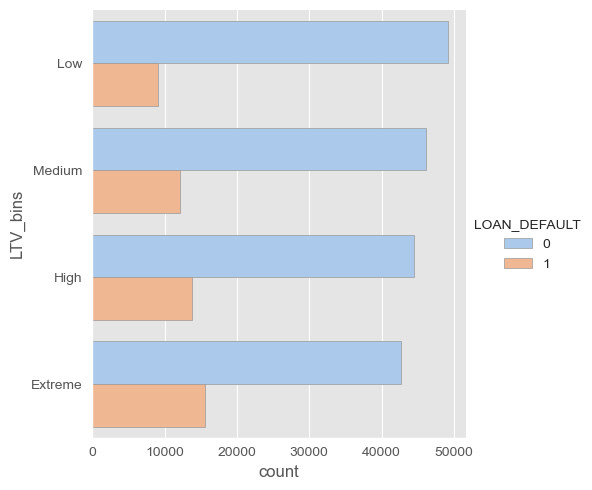

In [58]:
plot_bar("LTV_bins")


### 'PERFORM_CNS_SCORE': Bureau Score


count              233154.0
mean     289.46299441570807
std       338.3747790080087
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


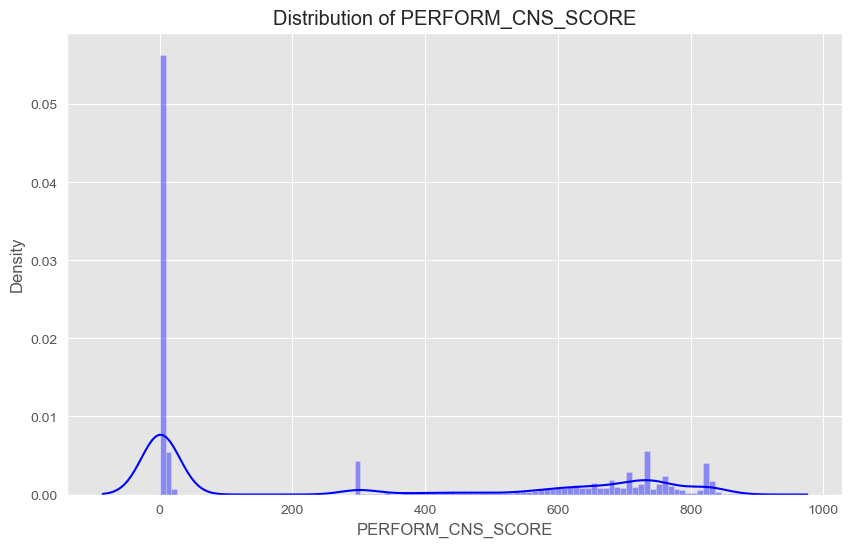

In [59]:
print(train.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','blue')


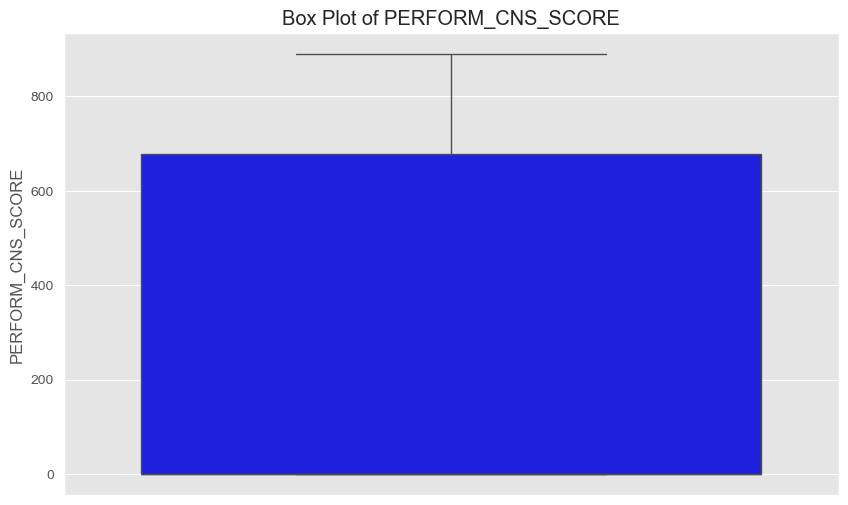

In [60]:
plot_box("PERFORM_CNS_SCORE", "blue")

In [61]:
outlier_data(train,"PERFORM_CNS_SCORE")

No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0


In [62]:

bin_labels = ["No History",'Very Low', "Low" ,'Medium', 'High']
cut_bins = [-1,10,150, 350, 650, 1000]

train['PERFORM_CNS_SCORE_bins'] = pd.cut(train['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PERFORM_CNS_SCORE_bins'].value_counts()


PERFORM_CNS_SCORE_bins
No History    116950
High           65034
Medium         28425
Very Low       12835
Low             9910
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

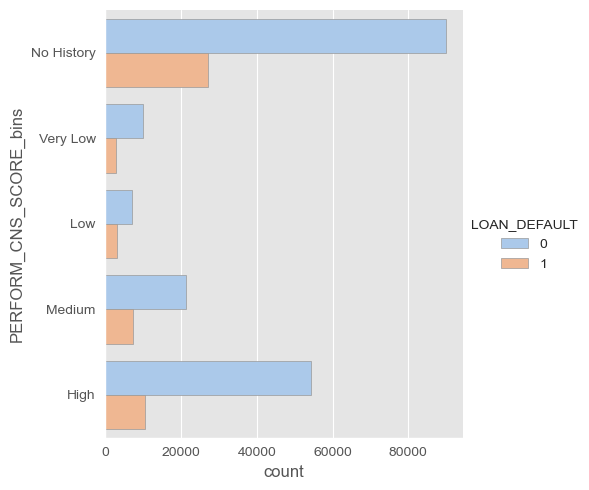

In [63]:
plot_bar("PERFORM_CNS_SCORE_bins")

In [64]:
train.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          High                       14124
                                                         No History                     0
                                                         Medium                         0
                                                         Low                            0
                                                         Very Low                       0
B-Very Low Risk                                          High                        9201
                                                         Medium                         0
                                                         Low                            0
                                                         Very Low                       0
                                                         No History                     0
C-Very Low Risk     

### PERFORM_CNS_SCORE_DESCRIPTION

In [65]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [66]:
g = train.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
gg = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (gg)

#train.groupby("PERFORM_CNS_SCORE_DESCRIPTION").LOAN_DEFAULT.value_counts(normalize=False)

                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0              11783   83.425375
                                                   1               2341   16.574625
B-Very Low Risk                                    0               7993   86.870992
                                                   1               1208   13.129008
C-Very Low Risk                                    0              13275   82.736055
                                                   1               2770   17.263945
D-Very Low Risk                                    0               9659   85.041381
                                                   1               1699   14.958619
E-Low Risk                                         0               4821   82.820821
                                                   1               1000   17

### PRI_NO_OF_ACCTS : count of total loans taken by the customer at the time of disbursement


count              233154.0
mean     2.4406358029456925
std       5.217233021576896
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


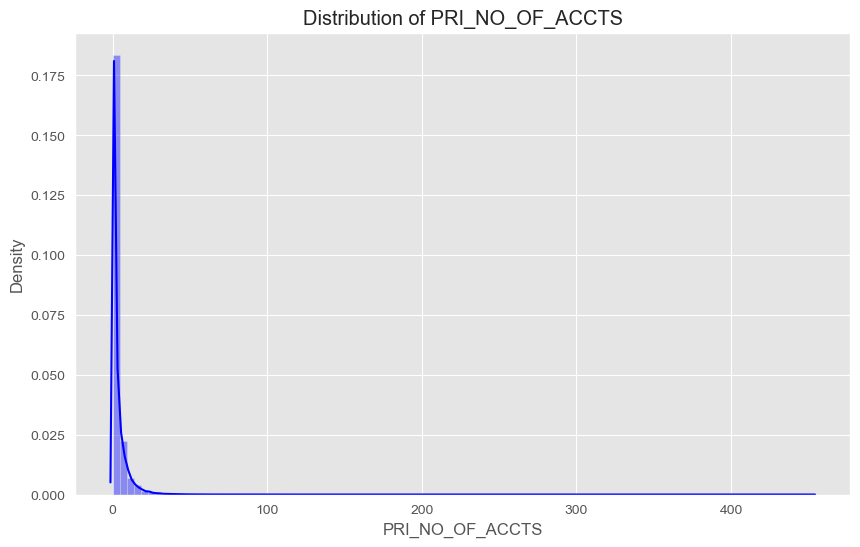

In [67]:
print(train.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')


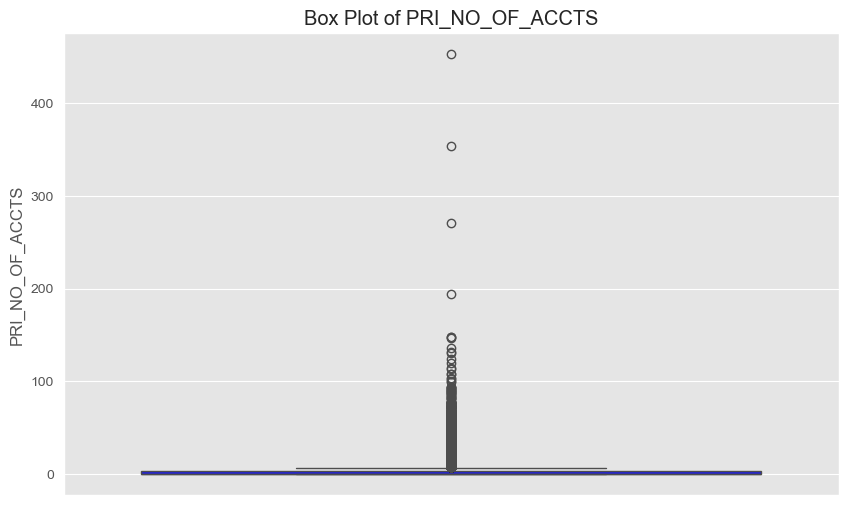

In [68]:
plot_box("PRI_NO_OF_ACCTS", "blue")

In [69]:
outlier_data(train,"PRI_NO_OF_ACCTS")

No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119


In [70]:
train["PRI_NO_OF_ACCTS_new"]= train["PRI_NO_OF_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_NO_OF_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [71]:

bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

train['PRI_NO_OF_ACCTS_bins'] = pd.cut(train['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_NO_OF_ACCTS_bins'].value_counts()

PRI_NO_OF_ACCTS_bins
One              151928
More than One     81226
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

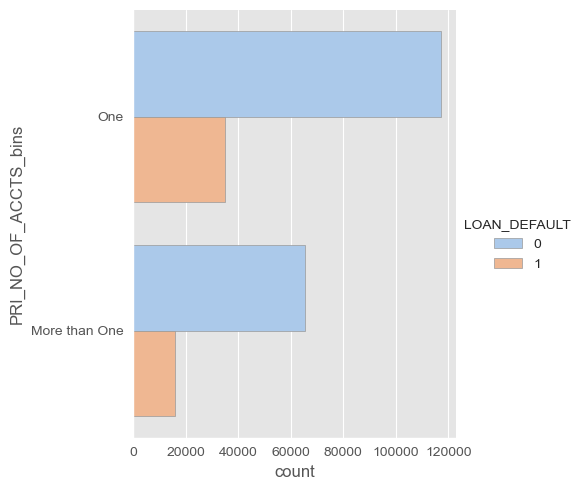

In [72]:
plot_bar("PRI_NO_OF_ACCTS_bins")

### PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement


count               233154.0
mean     0.15654889043293274
std       0.5487867498784913
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                     25.0
Name: PRI_OVERDUE_ACCTS, dtype: object


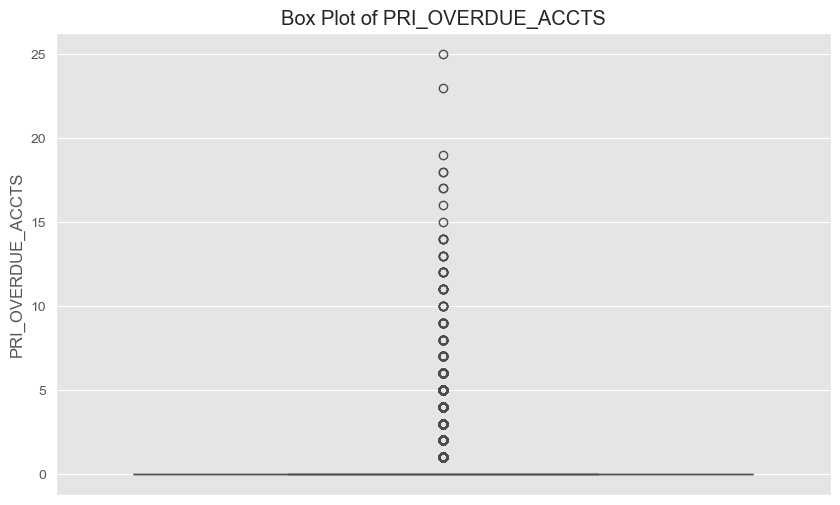

In [73]:
print(train.PRI_OVERDUE_ACCTS.describe().astype(str))
plot_box("PRI_OVERDUE_ACCTS", "blue")

In [74]:
outlier_data(train,"PRI_OVERDUE_ACCTS")


No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.549
Identified outliers: 6305


In [75]:
train["PRI_OVERDUE_ACCTS_new"]= train["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_OVERDUE_ACCTS_new")


No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [76]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

train['PRI_OVERDUE_ACCTS_bins'] = pd.cut(train['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_OVERDUE_ACCTS_bins'].value_counts()

PRI_OVERDUE_ACCTS_bins
None             206879
One (or more)     26275
Name: count, dtype: int64

<Figure size 1000x5000 with 0 Axes>

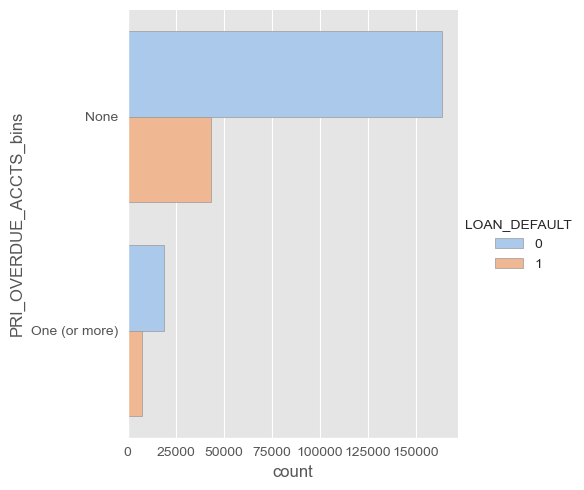

In [77]:
plot_bar("PRI_OVERDUE_ACCTS_bins")

## Let's look into data with lesser importance
#### MOBILENO_AVL_FLAG : if Mobile no. was shared by the customer then flagged as 1
#### AADHAR_FLAG : if aadhar was shared by the customer then flagged as 1
#### PAN_FLAG : if pan was shared by the customer then flagged as 1
#### VOTERID_FLAG : if voter  was shared by the customer then flagged as 1
#### PASSPORT_FLAG : if DL was shared by the customer then flagged as 1
#### DRIVING_FLAG : if passport was shared by the customer then flagged as 1

In [78]:
# var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
# plot_bar_comp(var,nrow=3)

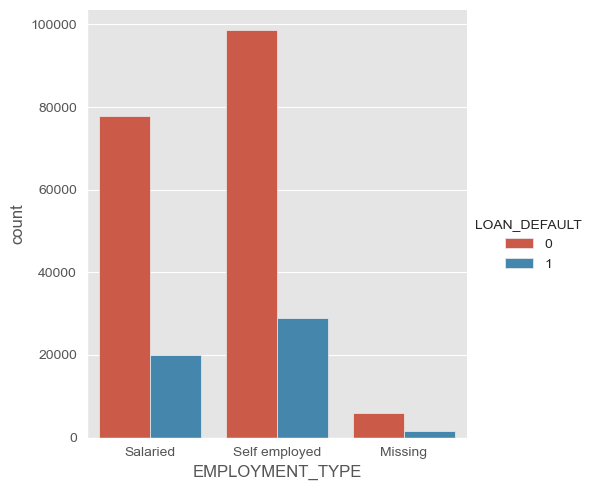

In [79]:
# Employment Type
sns.catplot(data=train,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

## Age is in days

In [80]:
now = pd.Timestamp('now')
#train['DATE_OF_BIRTH'] = train['DATE_OF_BIRTH'].where(train['DATE_OF_BIRTH'] < now, train['DATE_OF_BIRTH'] -  np.timedelta64(100, 'Y'))   
train['age'] = (now - train['DATE_OF_BIRTH'])  

train['age']= train['age'].astype(str)
train[['age','age_waste']] = train['age'].str.split("days",expand=True)
train['age']= train['age'].astype(str).astype(int)
train= train.drop(columns= ['age_waste'])

print(train['age'].head())

0    14885
1    14308
2    14284
3    11234
4    17099
Name: age, dtype: int32


In [81]:
train['disbursal_time'] = (now - train['DISBURSAL_DATE'])  

train['disbursal_time']= train['disbursal_time'].astype(str)
train[['disbursal_time','disbursal_time_waste']] = train['disbursal_time'].str.split("days",expand=True)
train['disbursal_time']= train['disbursal_time'].astype(str).astype(int)
train= train.drop(columns= ['disbursal_time_waste'])

print(train['disbursal_time'].head())

0    2252
1    2198
2    2254
3    2168
4    2198
Name: disbursal_time, dtype: int32


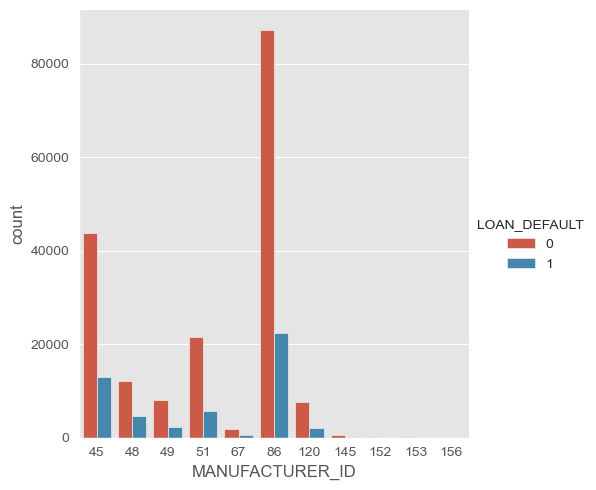

In [82]:
# MANUFACTURER_ID
sns.catplot(data=train,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

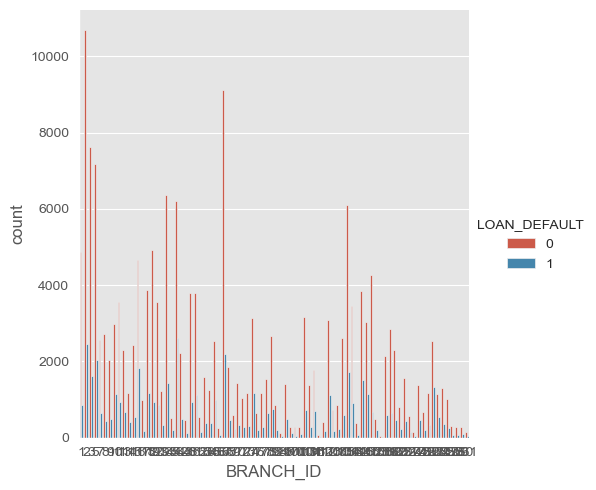

In [83]:
sns.catplot(data=train,kind='count',x='BRANCH_ID',hue='LOAN_DEFAULT')

#### Let's see the new columns along with the less important continous variables

<Figure size 640x480 with 0 Axes>

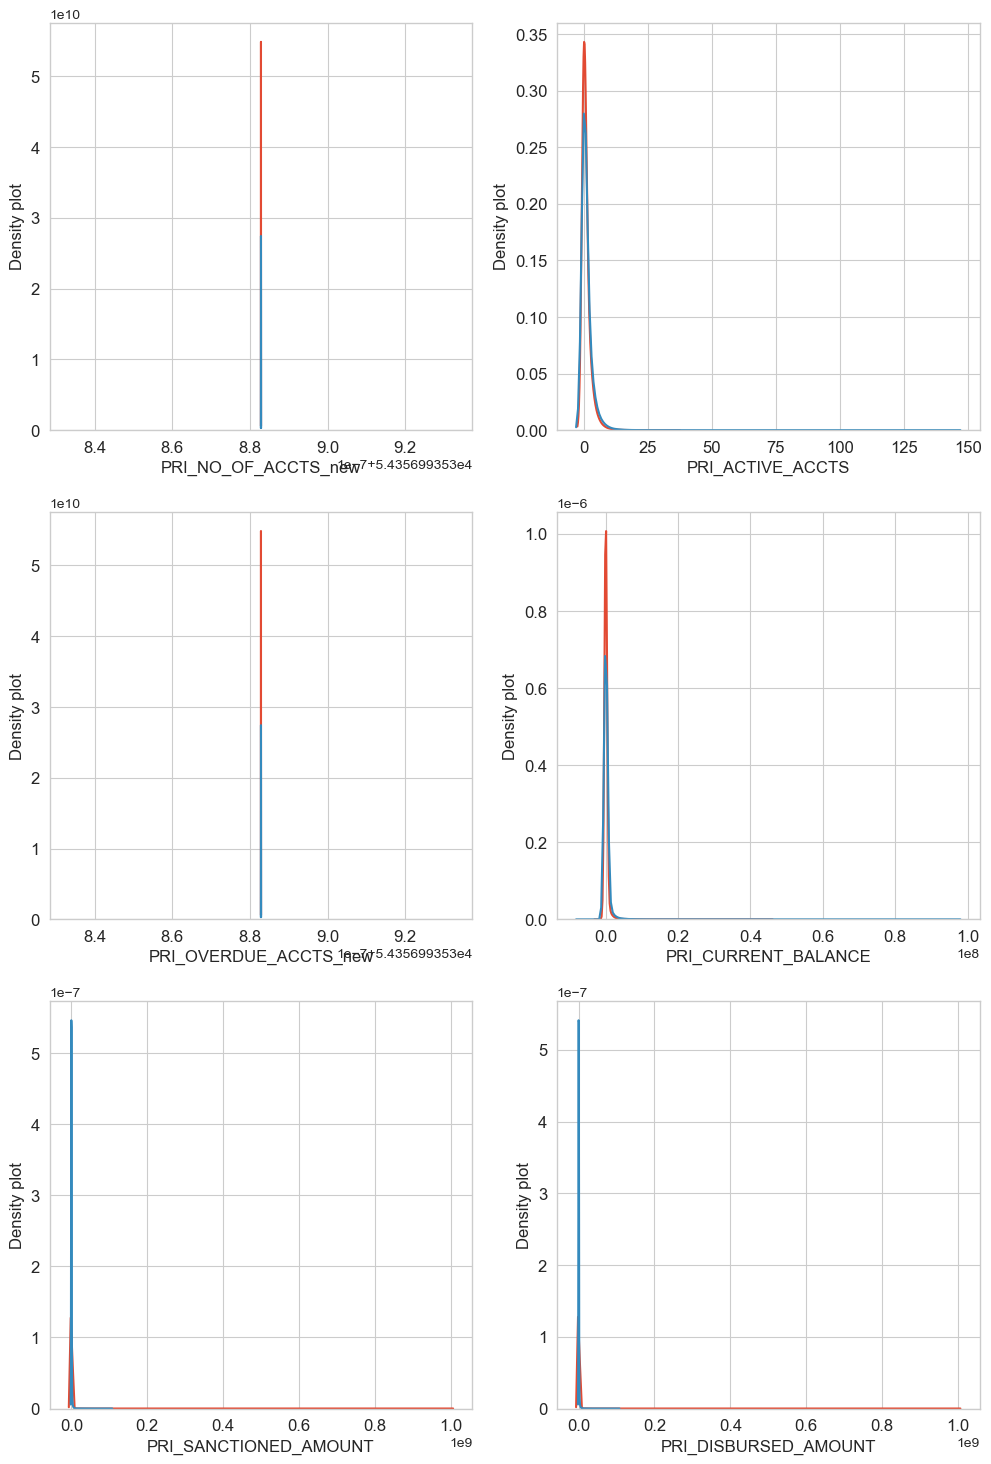

In [84]:
var = ['PRI_NO_OF_ACCTS_new', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS_new', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

<Figure size 640x480 with 0 Axes>

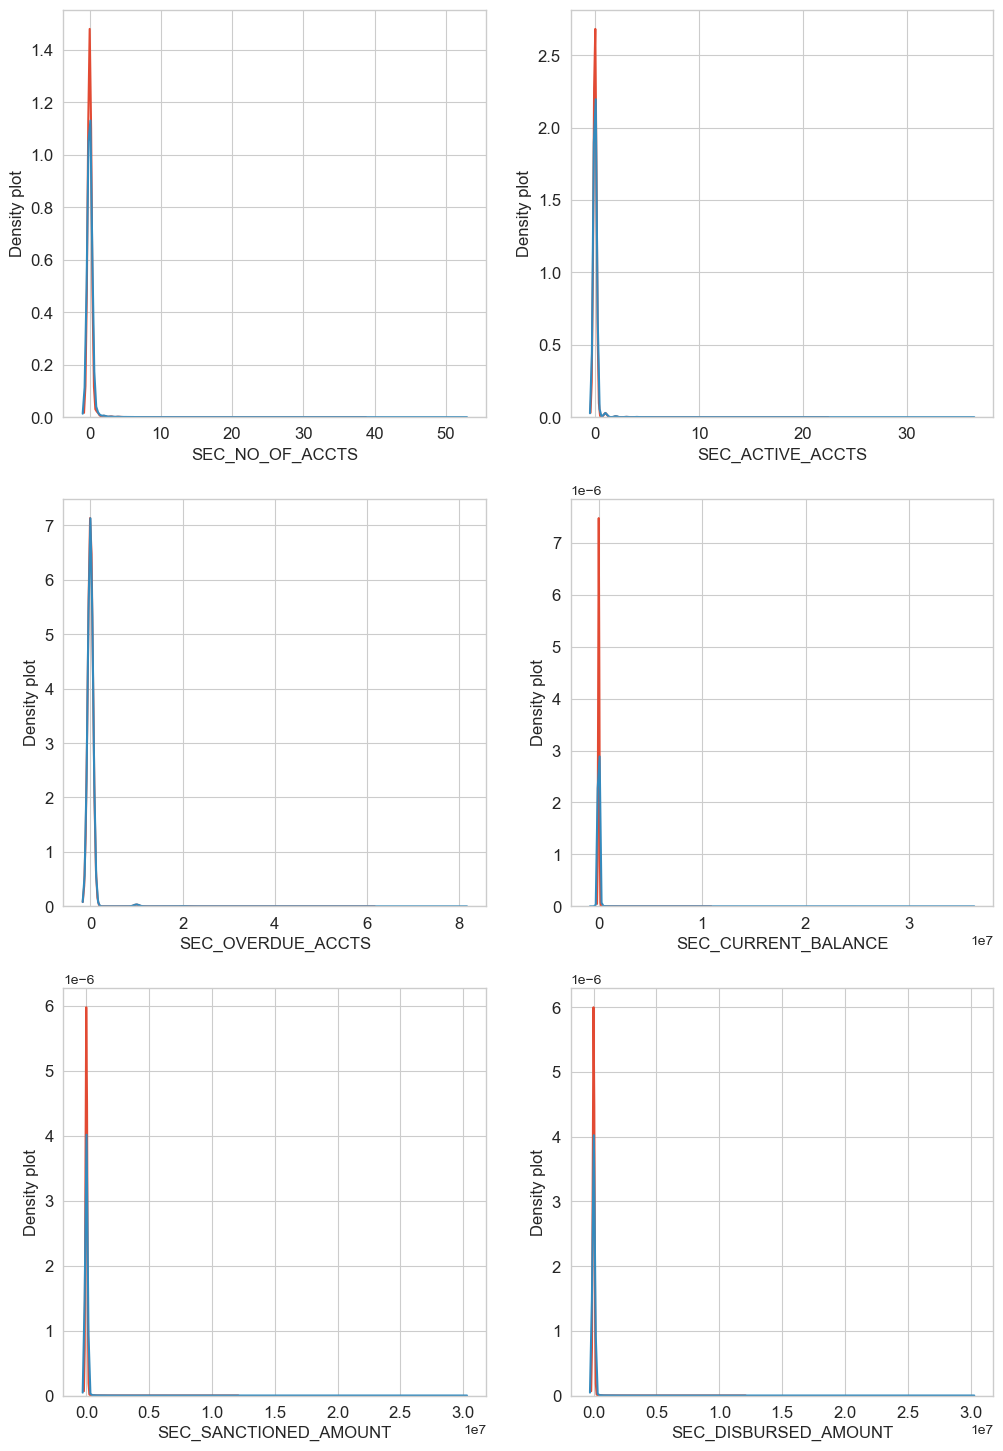

In [85]:
var = ['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

 <a id="8"></a>
    
<font size="+2" color="indigo"><b>3.5 Feature Selection</b></font><br>



In [86]:
#Useless features
#train = train.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
train = train.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

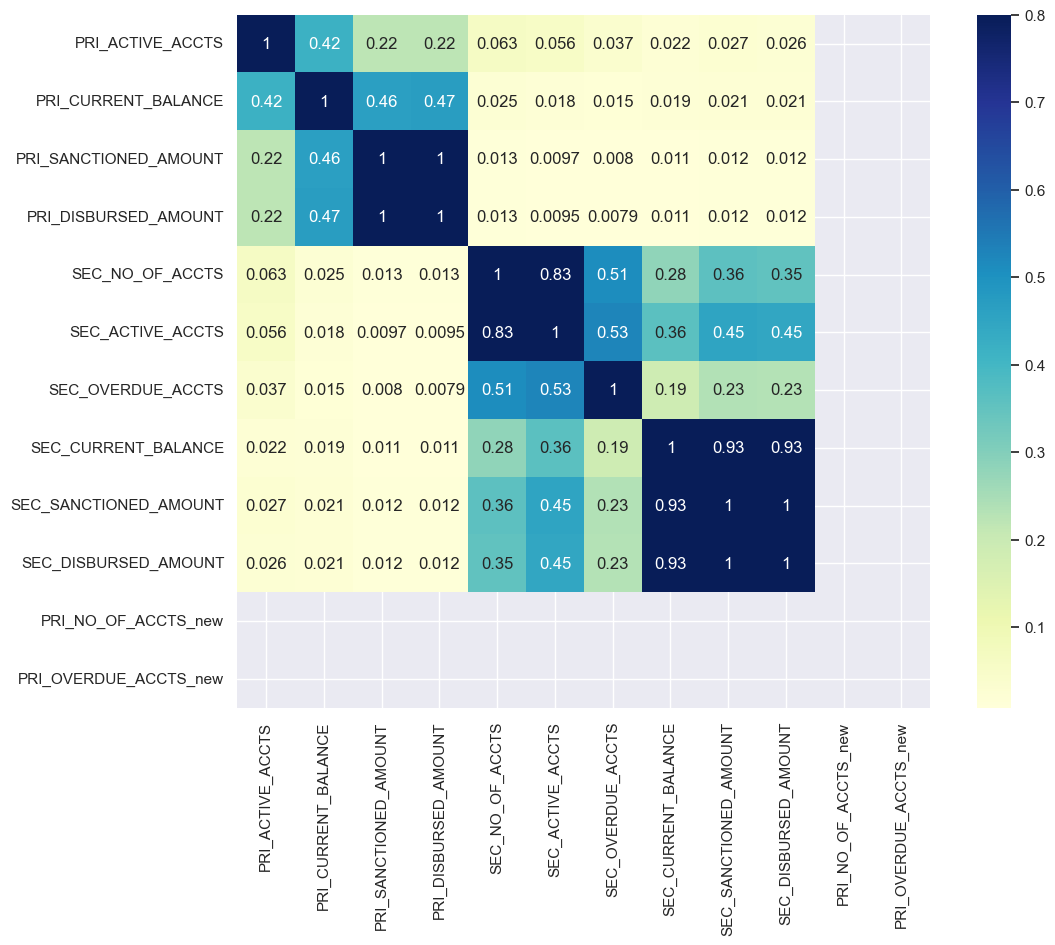

In [87]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT',  'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');


#### Not highly correlated with anyone: 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_OVERDUE_ACCTS'
#### 'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new'are perfectly positively correlated and hence keeping one 
#### 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS' are highly positively correlated, hence keeping one
####  'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' are highly positively correlated, hence keeping one



In [88]:
# train = train.drop(['PRI_OVERDUE_ACCTS_new','SEC_ACTIVE_ACCTS','SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' ],axis=1)

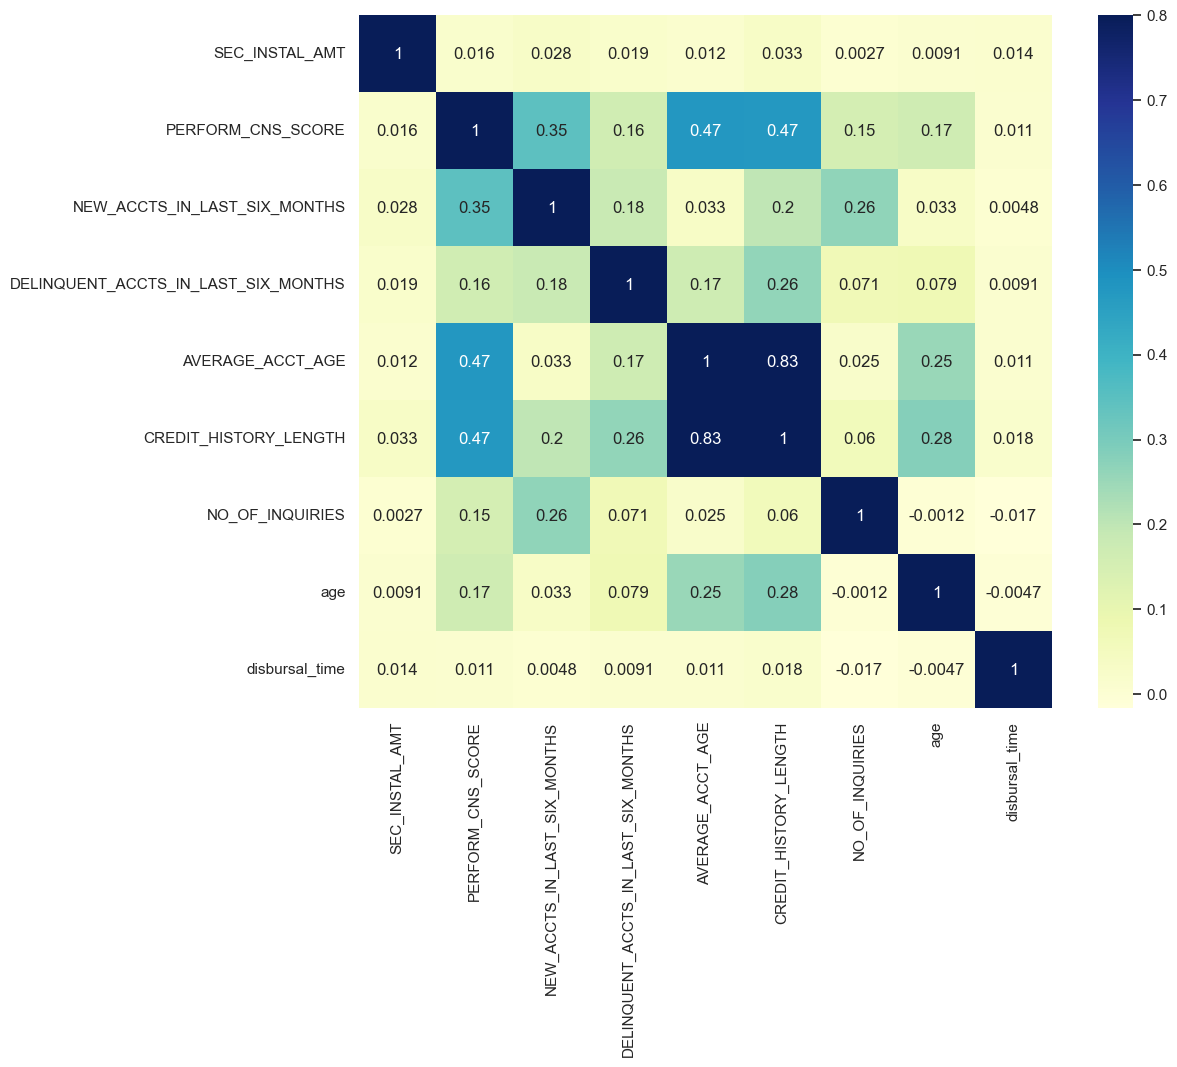

In [89]:
#Highly Correlated
sns.set()

cols = train[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

#### 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'are highly positively correlated and hence keeping one

In [90]:
#train = train.drop(['AVERAGE_ACCT_AGE' ],axis=1)

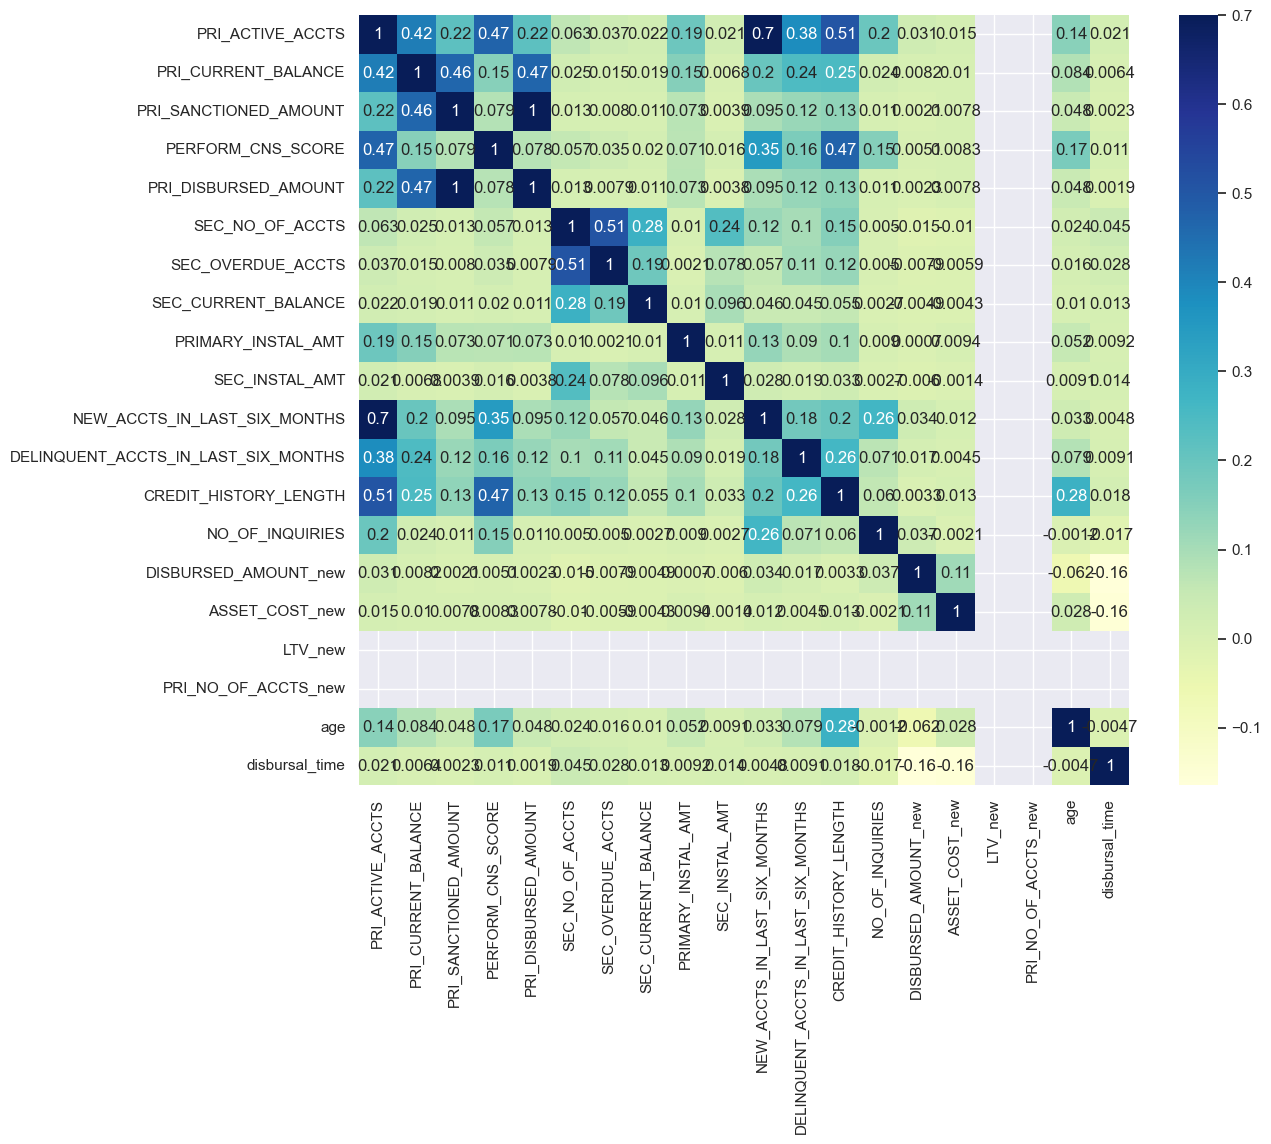

In [91]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','LTV_new','PRI_NO_OF_ACCTS_new','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

#### One out of 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT' 
#### One out of 'LTV_new', 'PRI_NO_OF_ACCTS_new'
#### Eliminate 'NEW_ACCTS_IN_LAST_SIX_MONTHS'

In [92]:
#train = train.drop(['PRI_SANCTIONED_AMOUNT','PRI_NO_OF_ACCTS_new','NEW_ACCTS_IN_LAST_SIX_MONTHS'],axis=1)

In [93]:
numeric_columns = list(train.select_dtypes(['number']).columns)


In [94]:
change_tocategory=[i for i in numeric_columns if len(train[i].unique())<=46]
#change_tocategory.remove('umbrella_limit')
change_tocategory

['MOBILENO_AVL_FLAG',
 'AADHAR_FLAG',
 'PAN_FLAG',
 'VOTERID_FLAG',
 'DRIVING_FLAG',
 'PASSPORT_FLAG',
 'PRI_ACTIVE_ACCTS',
 'PRI_OVERDUE_ACCTS',
 'SEC_NO_OF_ACCTS',
 'SEC_ACTIVE_ACCTS',
 'SEC_OVERDUE_ACCTS',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'NO_OF_INQUIRIES',
 'LOAN_DEFAULT',
 'LTV_new',
 'PRI_NO_OF_ACCTS_new',
 'PRI_OVERDUE_ACCTS_new']

In [95]:
train[change_tocategory]=train[change_tocategory].astype('category')


In [96]:
test.shape

(112392, 40)

### Preparing Datasets 1) Binned Variables 2) Continous variables

In [97]:
train.to_csv(f'{save_dir}/data_EDA.csv', index=None)
# test.to_csv(f'{save_dir}/data_EDA.csv', index=None)
object_columns = list(train.select_dtypes(['object']).columns)
train[object_columns]=train[object_columns].astype('category')
category_columns = list(train.select_dtypes(['category']).columns)
numeric_columns = list(train.select_dtypes(['number']).columns)

np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
